This mini-project was made at Big Data course in HCM University Technology. I just did this mini-project for understanding more about applications of Spark on analyzing big data. The below link is my reference for this project.

I had added Sentiment Intensity Analyzer from nltk library to compared with TextBlob.

https://github.com/Ani-pejakala/Sentiment-analysis-using-PySpark-on-social-media

In [2]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 67.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=0df2509c567210c811a6aff36d2229332b9c2b6a6207d7256a653448b95be995
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [1]:
import re
import nltk
import tweepy
import socket
import sys
import requests
import requests_oauthlib
import json
import csv
import time
import string
import folium
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

from datetime import datetime
from textblob import TextBlob
from wordcloud import WordCloud
from string import punctuation
from nltk.corpus import stopwords
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from folium import plugins
from IPython import display
from IPython.display import IFrame
from PIL import Image # converting images into arrays


from pyspark.sql.functions import col
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.sql.types import *
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import HashingTF, IDF
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tedom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tedom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tedom\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tedom\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\tedom\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tedom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

# 1. Collect data by API Twitter

In [ ]:
# retrive data
login = pd.read_csv('API_Twitter.csv')

# Twitter Api Credentials
consumerKey = login.Consumer_Key[0]
consumerSecret = login.Consumer_Secret[0]
accessToken = login.Acess_Token[0]
accessTokenSecret = login.Acess_Secret[0]

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# POTUS is nickname of President Biden on Twitter
query = 'POTUS'

# Open/Create a file to append data
csvFile = open('POTUS_data_200k_news.csv', 'w', encoding='utf-8')
placeCsvFile = open('POTUS_geo_data_news.csv', 'w', encoding='utf-8')

#Use csv Writer
csvWriter = csv.writer(csvFile)
placeCsvWriter = csv.writer(placeCsvFile)

cursor = tweepy.Cursor(api.search_tweets, q=query+' -RT', count=1000, tweet_mode='extended', 
                       lang="en", since="2021-01-01").items(200000)    

tweet_count = 0
print(tweet_count,datetime.now().time())

for tweet_info in cursor:
    time.sleep(0.1) 
    try:
        tweet_text = tweet_info.extended_tweet.full_text
    except AttributeError:
        tweet_text = tweet_info.full_text
        
    csvWriter.writerow([tweet_info.created_at, 
                        tweet_info.user.screen_name, 
                        tweet_text, 
                        tweet_info.favorite_count,
                        tweet_info.retweet_count])
    
    if tweet_info.place is not None:            
        placeCsvWriter.writerow([tweet_info.place.bounding_box.coordinates,
                            tweet_info.place.full_name,
                            tweet_info.place.country])
        
    tweet_count+=1
    if tweet_count%10000 == 0:
        print(tweet_count,datetime.now().time())        

Unexpected parameter: since


0 23:01:48.707972


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

10000 23:21:10.519704


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

20000 23:40:34.668428


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

30000 00:00:20.323286


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

40000 00:20:05.076545


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

50000 00:39:55.058900


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

60000 00:59:32.087640


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

70000 01:19:24.970086


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

80000 01:39:14.819532


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

90000 01:59:04.427327


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

100000 02:36:31.408975


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

110000 02:56:40.015278


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

120000 03:16:52.208095


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

130000 03:36:44.606164


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

140000 03:56:53.906373


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

150000 04:16:33.169071


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

160000 05:06:25.379019


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

170000 06:31:58.341006


Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

# 2. Cleaning and Analysis

In [2]:
col_names=['date','user','tweets','like','retweet']
df = pd.read_csv('POTUS_data_200k_news.csv', names=col_names)

df.tail()

,date,user,tweets,like,retweet
125526,2022-04-19 03:18:58+00:00,B9Shadab,@Tarannum1_ @DelhiPolice 🔥🔥#IndianMuslimsUnder...,0,0
125527,2022-04-19 03:18:56+00:00,bostonjoehickey,@POTUS I had no idea you were a comedian,0,0
125528,2022-04-19 03:18:52+00:00,Maninth88020024,@JoyceWhiteVance @EveAdam0 Makes one question ...,0,0
125529,2022-04-19 03:18:40+00:00,sayno2gas,"Dear @POTUS, By investing solar+battery+EV, im...",8,0
125530,2022-04-19 03:18:37+00:00,therealmeminski,"@SenWarren @POTUS Hey, you all but made sure h...",0,0


In [4]:
df.count()

date       125531
user       125531
tweets     125531
like       125531
retweet    125531
dtype: int64

In [3]:
# Sort dataframe by date column
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date',ascending=True)
df = df.reset_index().drop('index',axis=1)
df.head()

,date,user,tweets,like,retweet
0,2022-04-19 03:18:37+00:00,therealmeminski,"@SenWarren @POTUS Hey, you all but made sure h...",0,0
1,2022-04-19 03:18:40+00:00,sayno2gas,"Dear @POTUS, By investing solar+battery+EV, im...",8,0
2,2022-04-19 03:18:52+00:00,Maninth88020024,@JoyceWhiteVance @EveAdam0 Makes one question ...,0,0
3,2022-04-19 03:18:56+00:00,bostonjoehickey,@POTUS I had no idea you were a comedian,0,0
4,2022-04-19 03:18:58+00:00,B9Shadab,@Tarannum1_ @DelhiPolice 🔥🔥#IndianMuslimsUnder...,0,0


In [5]:
df = df.drop_duplicates('tweets')
df.shape

(120482, 5)

## 2.1 Data Analysis

In [6]:
#extract the tweet with more FAVs and more RTs:

fav_max = np.max(df['like'])
rt_max = np.max(df['retweet'])

fav = df[df.like == fav_max].index[0]
rt = df[df.retweet == rt_max].index[0]

# Max FAVs:
print("\nThe tweet with more likes is: \n{}".format(df['tweets'][fav]))
print("Number of likes: {}".format(fav_max))

# Max RTs:
print("\nThe tweet with more retweets is: \n{}".format(df['tweets'][rt]))
print("Number of retweets: {}".format(rt_max))


The tweet with more likes is: 
I know that families are still struggling with higher prices. I grew up in a family where if the price of gas went up, we felt it.
 
Let’s be absolutely clear about why prices are high right now: COVID and Vladimir Putin.
Number of likes: 49102

The tweet with more retweets is: 
I know that families are still struggling with higher prices. I grew up in a family where if the price of gas went up, we felt it.
 
Let’s be absolutely clear about why prices are high right now: COVID and Vladimir Putin.
Number of retweets: 8629


<AxesSubplot:xlabel='date'>

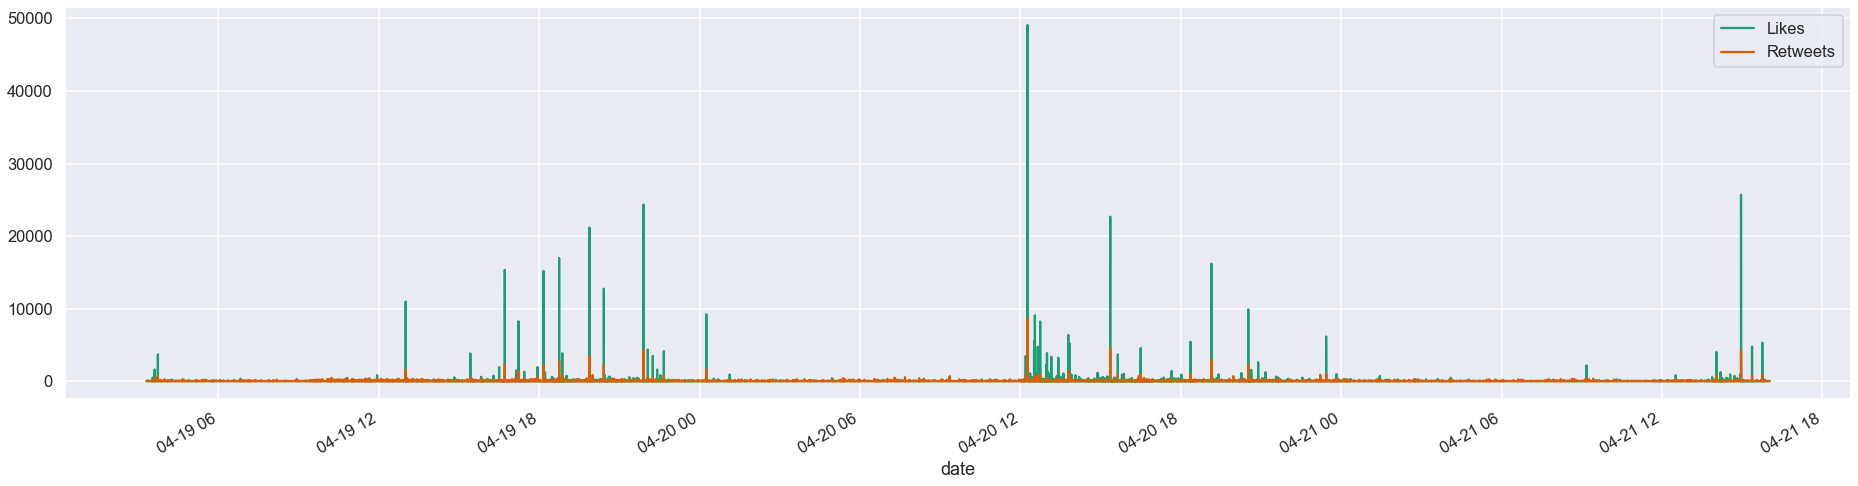

In [7]:
# Create time series for the data:

#tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=df['like'].values, index=df['date'])
tret = pd.Series(data=df['retweet'].values, index=df['date'])

# Likes vs retweets visualization:
tfav.plot(figsize=(32,8), label="Likes", legend=True)
tret.plot(figsize=(32,8), label="Retweets", legend=True)

In [8]:
#function to extract hashtags from every tweet
def hashtag_extract(tweets):
    hashtags = []
    # Loop over the words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

HT_regular = hashtag_extract(df['tweets'])

# unnesting list
HT_unnested = sum(HT_regular,[])

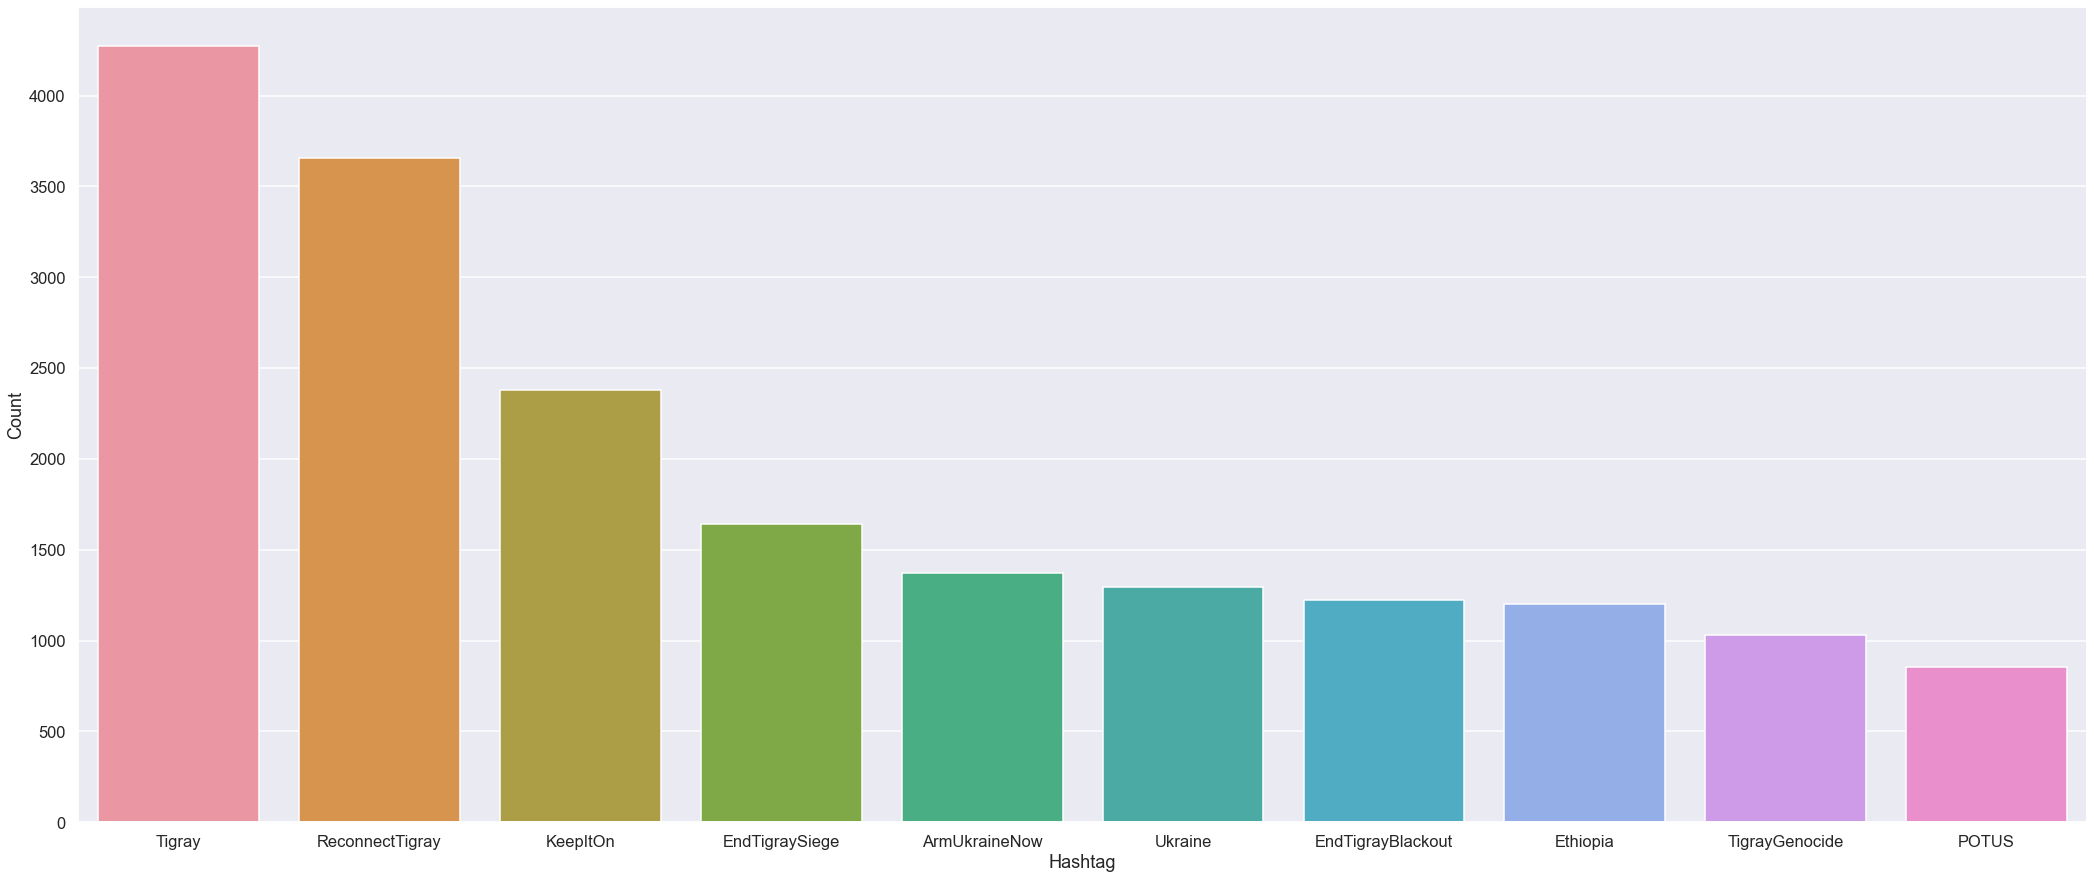

In [9]:
a = nltk.FreqDist(HT_unnested)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(36,15))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [10]:
df['like'].corr(df['retweet'])

0.93922476432534

<AxesSubplot:xlabel='like', ylabel='retweet'>

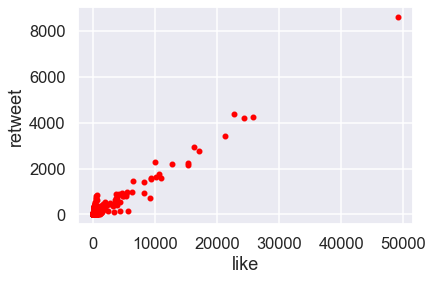

In [11]:
df.plot.scatter(x='like',y='retweet',c='r')

## 2.2 Data Cleaning 

In [12]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', '', tweet)
    # Remove words with <=2 letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uffff') 
    return tweet

df['clean_text'] = df['tweets'].apply(processTweet)
df.head()

,date,user,tweets,like,retweet,clean_text
0,2022-04-19 03:18:37+00:00,therealmeminski,"@SenWarren @POTUS Hey, you all but made sure h...",0,0,hey you all but made sure won the primary you ...
1,2022-04-19 03:18:40+00:00,sayno2gas,"Dear @POTUS, By investing solar+battery+EV, im...",8,0,dear investing solarbatteryev immediate consum...
2,2022-04-19 03:18:52+00:00,Maninth88020024,@JoyceWhiteVance @EveAdam0 Makes one question ...,0,0,makes one question just how serious this admin...
3,2022-04-19 03:18:56+00:00,bostonjoehickey,@POTUS I had no idea you were a comedian,0,0,had idea you were comedian
4,2022-04-19 03:18:58+00:00,B9Shadab,@Tarannum1_ @DelhiPolice 🔥🔥#IndianMuslimsUnder...,0,0,\ndumb idea that every info reachout wholeworl...


In [13]:
# drop duplicates
df = df.drop_duplicates('clean_text')
df.shape

(104034, 6)

# 2.3 Sentiment Categorizing
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways: a. Using TextBlob, b. Using NLTK's SentimentIntensityAnalyzer

### a. TextBlob

In [14]:
start_time = time.time()

def fetch_sentiment_using_textblob(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

df['category_TextBlob'] = df['clean_text'].apply(fetch_sentiment_using_textblob)

end_time = time.time()
elapsed_time = end_time - start_time
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:28.286697387695312[sec]


<ipython-input-14-3045abda8b55>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_TextBlob'] = df['clean_text'].apply(fetch_sentiment_using_textblob)


In [15]:
df.head()

,date,user,tweets,like,retweet,clean_text,category_TextBlob
0,2022-04-19 03:18:37+00:00,therealmeminski,"@SenWarren @POTUS Hey, you all but made sure h...",0,0,hey you all but made sure won the primary you ...,1
1,2022-04-19 03:18:40+00:00,sayno2gas,"Dear @POTUS, By investing solar+battery+EV, im...",8,0,dear investing solarbatteryev immediate consum...,0
2,2022-04-19 03:18:52+00:00,Maninth88020024,@JoyceWhiteVance @EveAdam0 Makes one question ...,0,0,makes one question just how serious this admin...,1
3,2022-04-19 03:18:56+00:00,bostonjoehickey,@POTUS I had no idea you were a comedian,0,0,had idea you were comedian,0
4,2022-04-19 03:18:58+00:00,B9Shadab,@Tarannum1_ @DelhiPolice 🔥🔥#IndianMuslimsUnder...,0,0,\ndumb idea that every info reachout wholeworl...,-1


In [16]:
# check the number of positive vs. negative tagged sentences
positives = df['category_TextBlob'][df.category_TextBlob == 1]
negatives = df['category_TextBlob'][df.category_TextBlob == -1]
neutrals = df['category_TextBlob'][df.category_TextBlob == 0]

print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is:  {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df.shape[0]))

number of positve categorized text is:  42320
number of negative categorized text is: 24384
number of neutral categorized text is:  37330
total length of the data is:            104034


### b. NLTK's SentimentIntensityAnalyzer

In [17]:
start_time = time.time()

def fetch_sentiment_using_SIA(tweet):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(tweet)
    if polarity_scores['neg'] > polarity_scores['pos']:
        return -1 
    elif polarity_scores['neg'] < polarity_scores['pos']:
        return 1 
    else:
        return 0

df['category_NLTK'] = df['clean_text'].apply(fetch_sentiment_using_SIA)

end_time = time.time()
elapsed_time = end_time - start_time
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:1359.8970038890839[sec]


<ipython-input-17-cdd2c765aacb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_NLTK'] = df['clean_text'].apply(fetch_sentiment_using_SIA)


In [18]:
# check the number of positive vs. negative tagged sentences
positives_NLTK = df['category_NLTK'][df.category_NLTK == 1]
negatives_NLTK = df['category_NLTK'][df.category_NLTK == -1]
neutrals_NLTK = df['category_NLTK'][df.category_NLTK == 0]

print('number of positve categorized text is:  {}'.format(len(positives_NLTK)))
print('number of negative categorized text is: {}'.format(len(negatives_NLTK)))
print('number of neutral categorized text is:  {}'.format(len(neutrals_NLTK)))
print('total length of the data is:            {}'.format(df.shape[0]))

number of positve categorized text is:  42025
number of negative categorized text is: 39545
number of neutral categorized text is:  22464
total length of the data is:            104034


# With TextBlob we have 24,384 negative tweets while NLTK we have 39,545 ones. That means NLTK print out the better results, so we choose NLTK for our model ML prediction.

## 2.4 Data Visualization

In [19]:
# tokenize helper function

def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

def remove_words(word_list):
    remove = ['narendra','potus','biden','...','“','”','’','…','biden’']
    return [w for w in word_list if w not in remove]


# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['clean_text'].apply(text_process) # tokenize style 1
df['no_potus'] = df['tokens'].apply(remove_words) #tokenize style 2
df = df.drop(['tokens'],axis=1)
df.head()

,date,user,tweets,like,retweet,clean_text,category_TextBlob,category_NLTK,no_potus
0,2022-04-19 03:18:37+00:00,therealmeminski,"@SenWarren @POTUS Hey, you all but made sure h...",0,0,hey you all but made sure won the primary you ...,1,1,"[hey, made, sure, primary, probably, sit, one,..."
1,2022-04-19 03:18:40+00:00,sayno2gas,"Dear @POTUS, By investing solar+battery+EV, im...",8,0,dear investing solarbatteryev immediate consum...,0,1,"[dear, investing, solarbatteryev, immediate, c..."
2,2022-04-19 03:18:52+00:00,Maninth88020024,@JoyceWhiteVance @EveAdam0 Makes one question ...,0,0,makes one question just how serious this admin...,1,1,"[makes, one, question, serious, administration..."
3,2022-04-19 03:18:56+00:00,bostonjoehickey,@POTUS I had no idea you were a comedian,0,0,had idea you were comedian,0,1,"[idea, comedian]"
4,2022-04-19 03:18:58+00:00,B9Shadab,@Tarannum1_ @DelhiPolice 🔥🔥#IndianMuslimsUnder...,0,0,\ndumb idea that every info reachout wholeworl...,-1,-1,"[dumb, idea, every, info, reachout, wholeworld..."


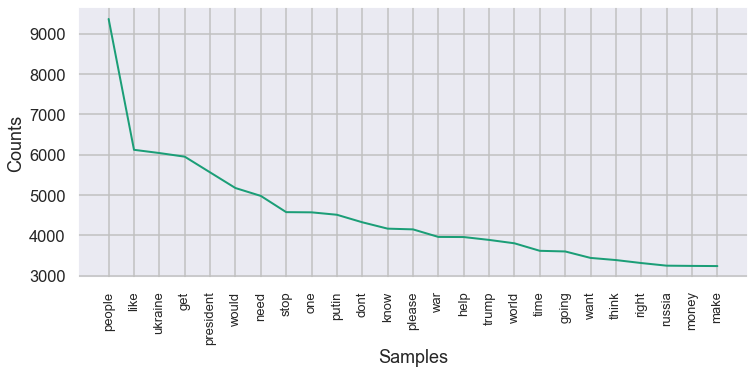

Text(0.5, 0, 'Word Rank')

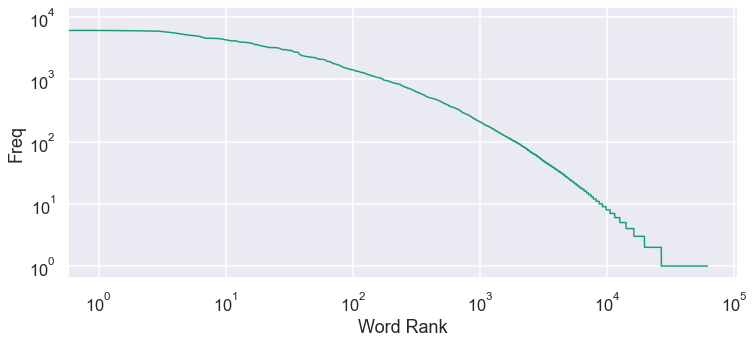

In [20]:
# plot word frequency distribution of first few words without narendra, potus
no_potus = []
for ls in df['no_potus']:
    words = [w for w in ls]
    for word in words:
        no_potus.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_potus)
fd.plot(25,cumulative=False)

# log-log  of all words -- no_potus 
word_counts = sorted(Counter(no_potus).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In [21]:
import urllib.request
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png'
filename = 'alice_mask.png'
urllib.request.urlretrieve(url, filename)

('alice_mask.png', <http.client.HTTPMessage at 0x2b190a6e520>)

In [22]:
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


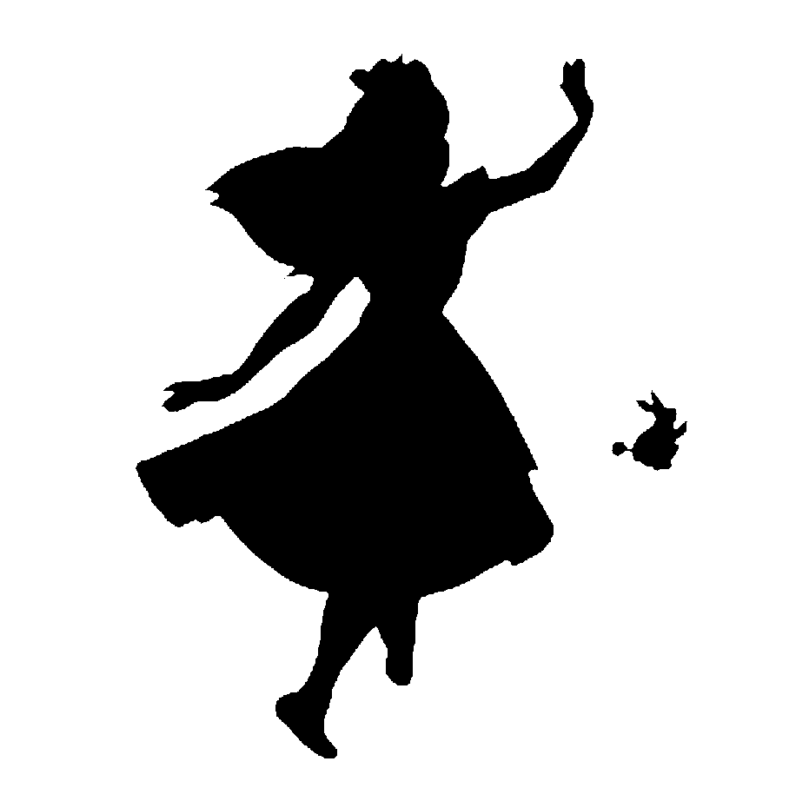

In [23]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

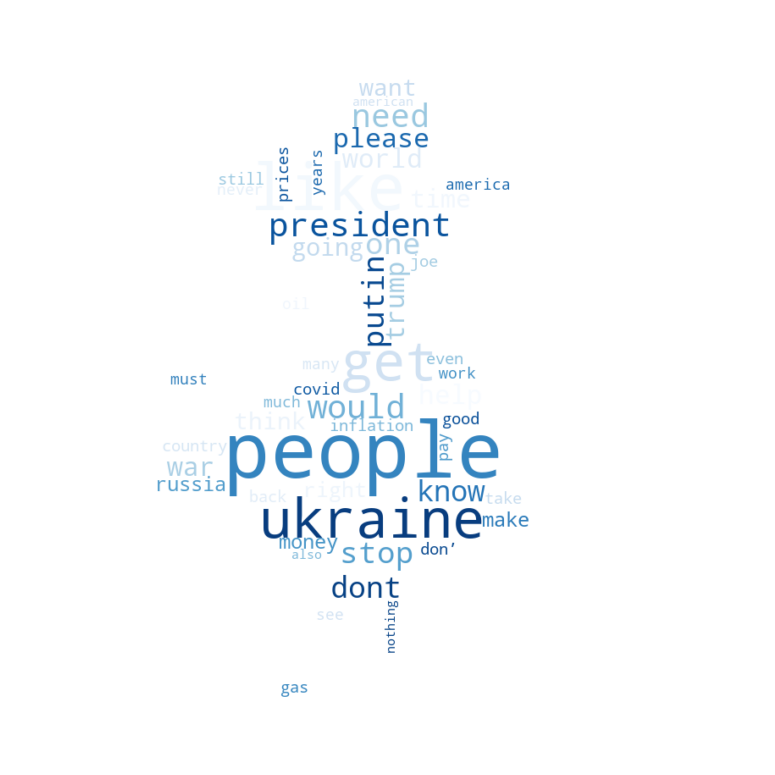

In [24]:
# split sentences to get individual words
all_words = []

for line in df['no_potus']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      mask=alice_mask,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [70]:
# save mask to alice_mask
birds_logo = np.array(Image.open('mask-birds.jpg'))

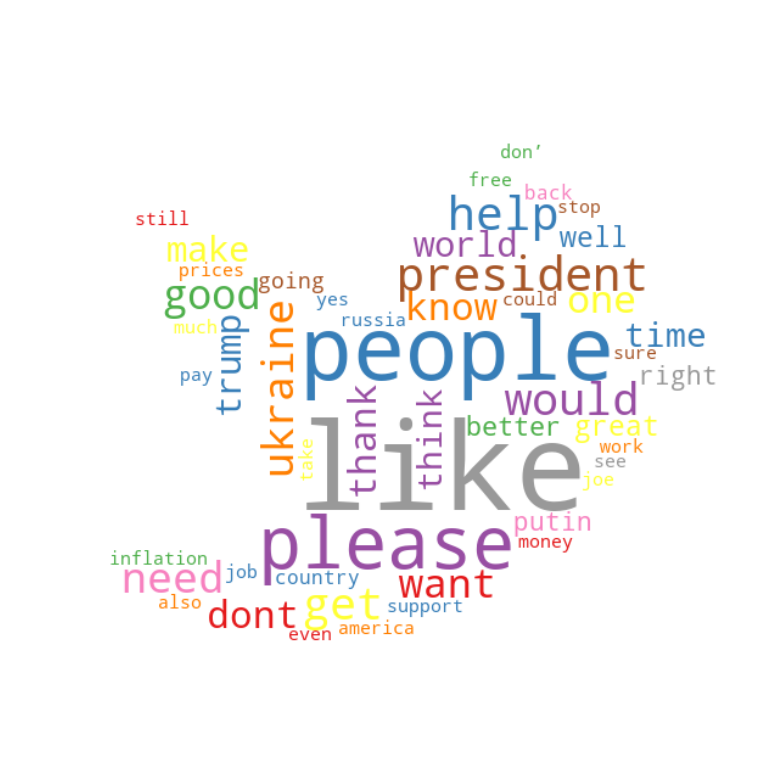

In [32]:
# split sentences to get individual positive words
all_pos_words = []
df_potus_pos = df[df.category_NLTK==1]
for line in df_potus_pos['no_potus']: # try 'tokens'
    all_pos_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_pos_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(background_color='white',
                      mask=birds_logo,
                      width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Set1_r',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
# save mask to alice_mask
sherlock_logo = np.array(Image.open('imask-sherlock.png'))


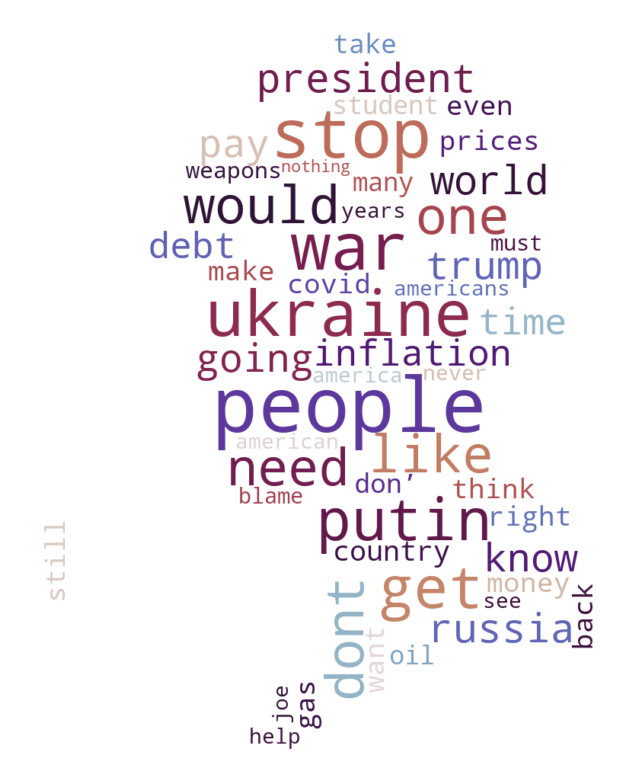

In [35]:
# split sentences to get individual negative words
all_neg_words = []
df_potus_neg = df[df.category_NLTK==-1]
#df_potus_neg.head()
for line in df_potus_neg['no_potus']: # try 'tokens'
    all_neg_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_neg_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(background_color='white',
                      mask=sherlock_logo,
                      width=900,
                      height=500,
                      max_words=50,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='twilight',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2.5 Cleaned Data

In [36]:
dataset = df.filter(['clean_text','category_NLTK'], axis=1)
dataset.shape

(104034, 2)

In [37]:
dataset.to_csv('Biden_comment.csv', index = False, sep=",", encoding="utf-8")

## 2.6 Visualization of Geo Spacial data

In [38]:
col_names=['bbox_cord','city','country']

df_geo = pd.read_csv('POTUS_geo_data_news.csv', names=col_names)

df_geo.head()

,bbox_cord,city,country
0,"[[[-81.2833269, 29.818762], [-81.262744, 29.81...","St Augustine Beach, FL",United States
1,"[[[-95.823268, 29.522325], [-95.069705, 29.522...","Houston, TX",United States
2,"[[[-95.774704, 35.995476], [-89.098843, 35.995...","Missouri, USA",United States
3,"[[[-95.774704, 35.995476], [-89.098843, 35.995...","Missouri, USA",United States
4,"[[[36.6645733, -1.3890532], [37.0626672, -1.38...","Nairobi, Kenya",Kenya


In [39]:
def geo_mean(x):
    y = json.loads(x)
    y = np.asarray(y)
    mean_geoloc = np.add(np.add((y[:][0][0]),(y[:][0][1]))/2,\
                         (np.add((y[:][0][2]),(y[:][0][3]))/2))/2    
    return np.around(mean_geoloc,decimals=6)

# append new column  and clean up df
df_geo['geo_code'] = df_geo['bbox_cord'].apply(geo_mean)
df_geo = df_geo.drop(['bbox_cord'],axis=1)
df_geo.head()

,city,country,geo_code
0,"St Augustine Beach, FL",United States,"[-81.273035, 29.839174]"
1,"Houston, TX",United States,"[-95.446486, 29.838495]"
2,"Missouri, USA",United States,"[-92.436774, 38.304558]"
3,"Missouri, USA",United States,"[-92.436774, 38.304558]"
4,"Nairobi, Kenya",Kenya,"[36.86362, -1.274863]"


In [40]:
# get latitudes and longitudes

# some helper funtions to get longs and lats
def lats(x):
    return x[1]

def longs(x):
    return x[0]

# --------------------------------------------------------#
# append longs and lats to dframe
df_geo ['latitude'] = df_geo ['geo_code'].apply(lats)
df_geo ['longitude'] = df_geo ['geo_code'].apply(longs)
df_geo.head()

,city,country,geo_code,latitude,longitude
0,"St Augustine Beach, FL",United States,"[-81.273035, 29.839174]",29.839174,-81.273035
1,"Houston, TX",United States,"[-95.446486, 29.838495]",29.838495,-95.446486
2,"Missouri, USA",United States,"[-92.436774, 38.304558]",38.304558,-92.436774
3,"Missouri, USA",United States,"[-92.436774, 38.304558]",38.304558,-92.436774
4,"Nairobi, Kenya",Kenya,"[36.86362, -1.274863]",-1.274863,36.863620


In [41]:
df_geo.to_csv('Bidenmaps.csv', index = False, sep=",", encoding="utf-8")

In [42]:
# use the folium library to create all tweet origins in the dataset on map of US
geoplots = []

for index, row in df_geo[['latitude','longitude']].iterrows():
    geoplots.append([row['latitude'],row['longitude']])
mus = folium.Map(location=[39, -99], zoom_start=4)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(mus)

mus.choropleth(geo_data='gz_2010_us_040_00_500k.json',
               fill_color='blue',
               fill_opacity=0.1,
               line_opacity=0.2,
               name='us_states')
    
mus.add_child(plugins.HeatMap(geoplots,
                            name='Twitter HeatMap',
                            radius=10,
                            max_zoom=1,
                            blur=10, 
                            max_val=3.0))

folium.TileLayer('cartodbpositron').add_to(mus)
folium.TileLayer('cartodbdark_matter').add_to(mus)
# folium.TileLayer('Mapbox Control Room').add_to(mus)
folium.LayerControl().add_to(mus)
mus.save("twitter_us_map.html") 
IFrame('twitter_us_map.html', width=960, height=520)


C:\Users\tedom\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
<ipython-input-42-1c1be5ef00a7>:20: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  mus.add_child(plugins.HeatMap(geoplots,


# 3. Apply Machine Learning by Spark

## 3.1. Preprocessing

In [66]:
'''
# Call Spark function
sc =SparkContext()
sqlContext = SQLContext(sc)
customSchema = StructType([
    StructField("clean_text", StringType()), 
    StructField("category_NLTK", StringType())])
'''

'\n# Call Spark function\nsc =SparkContext()\nsqlContext = SQLContext(sc)\ncustomSchema = StructType([\n    StructField("clean_text", StringType()), \n    StructField("category_NLTK", StringType())])\n'

In [67]:
filename = 'Biden_comment.csv'
customSchema = StructType([
    StructField("clean_text", StringType()), 
    StructField("category_NLTK", StringType())])

data = sqlContext.read.format("csv").option("header", "true").schema(customSchema).load(filename)
data = data.na.drop(how='any')
data.show(5)

+--------------------+-------------+
|          clean_text|category_NLTK|
+--------------------+-------------+
|hey you all but m...|            1|
|dear investing so...|            1|
|makes one questio...|            1|
|had idea you were...|            1|
|dumb idea that ev...|           -1|
+--------------------+-------------+
only showing top 5 rows



In [68]:
# Check type of variables
data.printSchema()

root
 |-- clean_text: string (nullable = true)
 |-- category_NLTK: string (nullable = true)



In [48]:
data.groupBy("category_NLTK").count().orderBy(col("count").desc()).show()

+-------------+-----+
|category_NLTK|count|
+-------------+-----+
|            1|41617|
|           -1|39157|
|            0|22225|
+-------------+-----+



## 3.2. Model Pipeline by Spark Machine Learning Pipelines API

In [49]:
# regular expression tokenizer
regexTokenizer = RegexTokenizer(inputCol="clean_text", outputCol="words", pattern="\\W")

# stop words
add_stopwords = ["http","https","amp","rt","t","c","the"] 

stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)

# bag of words count
countVectors = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=20000, minDF=5)

In [50]:
label_stringIdx = StringIndexer(inputCol = "category_NLTK", outputCol = "label")

pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)
dataset.show(3)

+--------------------+-------------+--------------------+--------------------+--------------------+-----+
|          clean_text|category_NLTK|               words|            filtered|            features|label|
+--------------------+-------------+--------------------+--------------------+--------------------+-----+
|hey you all but m...|            1|[hey, you, all, b...|[hey, you, all, b...|(13261,[0,1,5,11,...|  0.0|
|dear investing so...|            1|[dear, investing,...|[dear, investing,...|(13261,[2,15,60,1...|  0.0|
|makes one questio...|            1|[makes, one, ques...|[makes, one, ques...|(13261,[0,5,8,14,...|  0.0|
+--------------------+-------------+--------------------+--------------------+--------------------+-----+
only showing top 3 rows



## 3.3. Model Training and Evaluation

In [51]:
# set seed for reproducibility
(X_train, X_test) = dataset.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(X_train.count()))
print("Test Dataset Count: " + str(X_test.count()))

Training Dataset Count: 72065
Test Dataset Count: 30934


In [52]:
X_train

DataFrame[clean_text: string, category_NLTK: string, words: array<string>, filtered: array<string>, features: vector, label: double]

In [53]:
# Using Logistic Regression model for Count Vector Features
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(X_train)

predictions = lrModel.transform(X_test)

predictions.filter(predictions['prediction'] == 0)\
           .select("clean_text","category_NLTK","probability","label","prediction")\
           .orderBy("probability", ascending=False).show(n = 15, truncate = 30)

+------------------------------+-------------+------------------------------+-----+----------+
|                    clean_text|category_NLTK|                   probability|label|prediction|
+------------------------------+-------------+------------------------------+-----+----------+
|good morning you beautiful ...|            1|[0.999518882047622,3.954264...|  0.0|       0.0|
|but you seem like such love...|            1|[0.9994710019214237,4.89473...|  0.0|       0.0|
|catherine not sure and know...|            1|[0.9991915737699862,7.28038...|  0.0|       0.0|
|you and imy fellow citizens...|            1|[0.9990473170726085,7.94546...|  0.0|       0.0|
|thank you president for bei...|            1|[0.9989204485023635,5.91539...|  0.0|       0.0|
|blessed with joy love peace...|            1|[0.9987722304418628,8.76930...|  0.0|       0.0|
|you and imy fellow citizens...|            1|[0.9986943601190517,0.00113...|  0.0|       0.0|
|good evening would like inv...|            1|[0.9

In [54]:
# Prediction model
pred = MulticlassClassificationEvaluator(predictionCol="prediction")
pred.evaluate(predictions)

0.7883715563149205

## 3.4. Logistic Regression with TF-IDF Features

In [55]:
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=20000)
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, hashingTF, idf, label_stringIdx])

pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)

(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)
lrModel = lr.fit(trainingData)

predictions = lrModel.transform(testData)

predictions.filter(predictions['prediction'] == 0) \
           .select("clean_text","category_NLTK","probability","label","prediction") \
           .orderBy("probability", ascending=False) \
           .show(n = 10, truncate = 30)

+------------------------------+-------------+------------------------------+-----+----------+
|                    clean_text|category_NLTK|                   probability|label|prediction|
+------------------------------+-------------+------------------------------+-----+----------+
|good morning you beautiful ...|            1|[0.999578127498413,3.201142...|  0.0|       0.0|
|but you seem like such love...|            1|[0.9994851995532926,4.55136...|  0.0|       0.0|
|you and imy fellow citizens...|            1|[0.9983521862781204,0.00137...|  0.0|       0.0|
|you and imy fellow citizens...|            1|[0.9983073096409671,0.00141...|  0.0|       0.0|
|amazon dropshipping expert ...|            1|[0.9976906166338303,0.00183...|  0.0|       0.0|
|you are wonderful man const...|            1|[0.9975501124449112,0.00226...|  0.0|       0.0|
|thank you president for bei...|            1|[0.9975243980247784,0.00192...|  0.0|       0.0|
|good evening would like inv...|            1|[0.9

In [56]:
pred = MulticlassClassificationEvaluator(predictionCol="prediction")
pred.evaluate(predictions)

0.7567934409758497

## 3.5. Cross-Validation

In [57]:
pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx])

pipelineFit = pipeline.fit(data)
dataset = pipelineFit.transform(data)
(X_train, X_test) = dataset.randomSplit([0.7, 0.3], seed = 100)

lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

In [58]:
# try cross-validation to tune our hyper parameters, the count vectors Logistic Regression

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.3, 0.5]) # regularization parameter
             .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.2]) # Elastic Net Parameter (Ridge = 0)
             .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=pred, \
                    numFolds=5)

cvModel = cv.fit(X_train)

predictions = cvModel.transform(X_test)
# Evaluate best model
pred = MulticlassClassificationEvaluator(predictionCol="prediction")
pred.evaluate(predictions)

0.8072310722186171

## 3.6. Test the other models

### Naive Bayes

In [59]:
nb = NaiveBayes(smoothing=1)
model = nb.fit(trainingData)
predictions = model.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
           .select("clean_text","category_NLTK","probability","label","prediction") \
           .orderBy("probability", ascending=False) \
           .show(n = 10, truncate = 30)

+------------------------------+-------------+------------------------------+-----+----------+
|                    clean_text|category_NLTK|                   probability|label|prediction|
+------------------------------+-------------+------------------------------+-----+----------+
|wont invade ️ wait started ...|            1|[1.0,1.1054768440145098E-16...|  0.0|       0.0|
|why wouldnt the government ...|           -1|[1.0,1.083923709819552E-16,...|  1.0|       0.0|
|joe biden longer president ...|           -1|[1.0,1.0813769530139167E-16...|  1.0|       0.0|
|damn ’ and didn’ have 300k ...|           -1|[1.0,1.0700065734001576E-16...|  1.0|       0.0|
|lets stand behind show our ...|            1|[1.0,1.0462778988866348E-16...|  0.0|       0.0|
|with respectyou campaign pr...|            1|[1.0,9.679094151965313E-17,...|  0.0|       0.0|
|boring has had much success...|            1|[1.0,9.63757481911428E-17,3...|  0.0|       0.0|
|okay lets say the economy g...|            1|[1.0

In [60]:
pred = MulticlassClassificationEvaluator(predictionCol="prediction")
pred.evaluate(predictions)

0.6985643649219562

### Decision Tree

In [61]:
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(trainingData)
predictions = dtModel.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
           .select("clean_text","category_NLTK","probability","label","prediction") \
           .orderBy("probability", ascending=False) \
           .show(n = 8, truncate = 20)

+--------------------+-------------+--------------------+-----+----------+
|          clean_text|category_NLTK|         probability|label|prediction|
+--------------------+-------------+--------------------+-----+----------+
|makes sick americ...|            1|       [1.0,0.0,0.0]|  0.0|       0.0|
|send nato troops ...|           -1|       [1.0,0.0,0.0]|  1.0|       0.0|
|miss you like the...|            1|[0.50431034482758...|  0.0|       0.0|
|dear please stop ...|           -1|[0.50431034482758...|  1.0|       0.0|
|any questions ple...|           -1|[0.50431034482758...|  1.0|       0.0|
|its time for you ...|           -1|[0.50431034482758...|  1.0|       0.0|
|dear president yo...|            1|[0.50431034482758...|  0.0|       0.0|
|dude need more jo...|            1|[0.50431034482758...|  0.0|       0.0|
+--------------------+-------------+--------------------+-----+----------+
only showing top 8 rows



In [62]:
pred = MulticlassClassificationEvaluator(predictionCol="prediction")
pred.evaluate(predictions)

0.32467203658780514

### Random Forest

In [63]:
rf = RandomForestClassifier(labelCol="label", \
                            featuresCol="features", \
                            numTrees = 100, \
                            maxDepth = 4, \
                            maxBins = 32)

# Train model with Training Data
rfModel = rf.fit(trainingData)
predictions = rfModel.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
           .select("clean_text","category_NLTK","probability","label","prediction") \
           .orderBy("probability", ascending=False) \
           .show(n = 10, truncate = 30)

+------------------------------+-------------+------------------------------+-----+----------+
|                    clean_text|category_NLTK|                   probability|label|prediction|
+------------------------------+-------------+------------------------------+-----+----------+
|president biden know your d...|            1|[0.4669174847362567,0.36088...|  0.0|       0.0|
|thank you for you your grea...|            1|[0.44996622971946126,0.3644...|  0.0|       0.0|
|thank you president biden f...|            1|[0.4497250121834479,0.36481...|  0.0|       0.0|
|love this sounds like great...|            1|[0.44936651360922775,0.3517...|  0.0|       0.0|
|you sir are true american h...|            1|[0.44923055896589903,0.3653...|  0.0|       0.0|
|many students take these lo...|            1|[0.44820594131427755,0.3753...|  0.0|       0.0|
|thank you you are right but...|            1|[0.44817267761697727,0.3609...|  0.0|       0.0|
|biden from the people ameri...|            1|[0.4

In [64]:
pred = MulticlassClassificationEvaluator(predictionCol="prediction")
pred.evaluate(predictions)

0.3201051974941875